<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/M%C3%A9todo%20de%20Aceptaci%C3%B3n%20y%20Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Aceptación y Rechazo

El método de aceptación y rechazo es una técnica general para generar variables aleatorias cuando la función de densidad no permite una transformación directa.
Consiste en proponer muestras de una distribución más simple y luego aceptarlas o rechazarlas según una condición basada en la relación entre la densidad de la distribución deseada y la densidad de la distribución propuesta.



*   **PASO 1:** Generar dos números aleatorios $R_1$ y $R_2$
*   **PASO 2:** Determinar $x$
$$ x = a + (c-a) R_1 $$
*   **PASO 3:** Evaluar $f$ en $x$
*   **PASO 4:** Si $R_2 ≤ \frac{f(x)}{M}$, aceptar $x$. Otro caso, rechazar $x$


La distribución triangular con parámetros $a$ (mínimo), $b$ (máximo) y $c$ (modo), tiene una forma triangular (como su nombre indica) y su función de densidad es:
$$
f(x) =
\begin{cases}
\frac{2(x - a)}{(c - a)(b - a)} & \text{si } a \leq x \leq b \\
\frac{-2(x - c)}{(c - a)(c - b)} & \text{si } b < x \leq c
\end{cases}
$$

El siguiente código implementa el método de Aceptación y Rechazo para generar la distribución triangular de parámetros a=1, b=3, c=5.

In [29]:
# Importamos las librerías necesarias
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Parámetros de la distribución triangular
a = 1 # mínimo
b = 3  # modo
c = 5 # máximo

# Función de densidad f(x) de la distribución triangular
def triangular(x):
    if a <= x <= b:
        return 2*(x-a) / ((c-a)*(b-a))
    elif b < x <= c:
        return ((-2)*(x-c)) / ((c-a)*(c-b))
    else:
        return 0

In [31]:
# Valor máximo de la función de densidad (en x=b)
M = 2/(c-a)

# Método de aceptación y rechazo
def aceptacion(n):
  lista = [] # lista para almacenar los datos aceptados
  for i in range(n):
    R1 = rd.random()
    R2 = rd.random()
    x = a + (c-a)*R1  # generar x en [a, c]

# Utilizamos la condición if para aceptar o rechazar los valores
    if R2 <= triangular(x)/M: #criterio de aceptación
      lista.append(x) #guardamos los valores aceptados en la lista creada anteriormente
  return lista

In [32]:
# Mandamos llamar la función de aceptación y rechazo, con 10000 intentos
datos = aceptacion(10000)
#print(datos) # podemos imprimimos la lista con los valores aceptados

(array([  3.,   4.,   7.,  13.,  11.,  12.,  10.,  19.,  17.,  19.,  20.,
         29.,  30.,  24.,  30.,  27.,  35.,  33.,  40.,  32.,  45.,  42.,
         46.,  45.,  45.,  44.,  47.,  53.,  56.,  50.,  73.,  47.,  77.,
         78.,  68.,  65.,  72.,  70.,  85.,  83.,  81.,  87.,  94.,  74.,
         95., 104.,  89.,  91.,  77.,  94., 105.,  90., 100.,  84.,  80.,
         82., 104.,  73.,  77.,  93.,  69.,  70.,  70.,  57.,  66.,  56.,
         69.,  74.,  56.,  62.,  61.,  58.,  75.,  52.,  63.,  58.,  51.,
         45.,  47.,  41.,  38.,  47.,  35.,  35.,  39.,  26.,  33.,  22.,
         24.,  27.,  24.,  21.,  12.,  13.,  12.,  16.,  15.,   6.,   4.,
          7.]),
 array([1.0388721 , 1.07791199, 1.11695187, 1.15599175, 1.19503164,
        1.23407152, 1.2731114 , 1.31215129, 1.35119117, 1.39023106,
        1.42927094, 1.46831082, 1.50735071, 1.54639059, 1.58543047,
        1.62447036, 1.66351024, 1.70255012, 1.74159001, 1.78062989,
        1.81966977, 1.85870966, 1.89774954, 1.

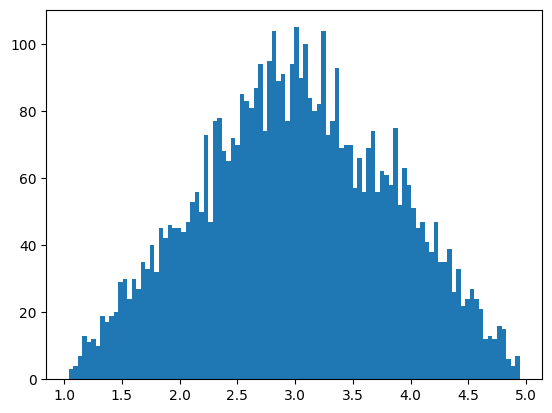

In [33]:
# Imprimimos el histograma con los valores aceptados
plt.hist(datos, bins=100)

In [34]:
# Calculamos e imprimimos la media y la varianza de la muestra
print("La media es:", np.mean(datos))
print("La desviación estándar es:", np.std(datos))

# Resultados teóricos
media = (a+b+c)/3
var = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
desv_std= np.sqrt(var)
print("\nComparando con los resultados teóricos:")
print("La media teórica:", media)
print("La desviación estándar teórica:", desv_std)

La media es: 3.0090539675206345
La desviación estándar es: 0.8210085545993513

Comparando con los resultados teóricos:
La media teórica: 3.0
La desviación estándar teórica: 0.816496580927726


In [35]:
# Cuántos valores fueron aceptados
len(datos)

5036